___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg</p>

### <font color= #2E9AFE> Tema: Clasificación</font>


#### Características
- Consiste en un ensamblado **secuencial** de árboles de decisión. Los árboles se agregan secuencialmente con la finalidad de aprender del resultado de árboles anteriores y corregir el error producido por los mismos, hasta que ya no se pueda corregir dicho error.
- Utiliza el procesamiento en paralelo, poda de árboles, manejo de valores nulos, regularización para evitar el sobreajuste del modelo 

#### Aplicaciones
Uno de los sectores en los que se aplican este tipo de algoritmos es el financiero.
Algunos ejemplos de su aplicación son: segmentación de clientes, detección de fraudes, pronóstico de ventas, autenticación de clientes y análisis de comportamiento de mercados. 

Un área de interés es identificar clientes a quienes otorgar una tarjeta de crédito, esto es crítico para los bancos, ya que una selección incorrecta de estos clientes podría derivar en un incremento de su cartera vencida.


#### Parámetros a optimizar

- Tasa de aprendizaje (eta)
- Profundidad del árbol
- Gamma (para podar el árbol)
- Lambda (regularización)
- Min child weight
- scale_pos_weigth

#### Ventajas de XGBoost

- Puede manejar grandes bases de datos con muchas variables
- Puede manejar datos nulos
- Resultados muy precisos
- Rápidos de ejecutar

#### Desventajas de XGBoost
- Puede consumir muchos recursos computacionales, por lo que se recomienda determinar antes cuáles son las variables que aportarán más información al modelo
- Se deben ajustar correctamente los parámetros del algoritmo
- Es conveniente transformar los datos a que todos sean numéricos

## Clasificación

### Datos

Vamos a utilizar los datos de **IBM Base Samples** para predecir si un cliente va a dejar de usar los servicios de IBM. 

Los datos se pueden descargar de:
https://www.kaggle.com/yeanzc/telco-customer-churn-ibm-dataset

Se tienen 7043 observaciones y 33 variables

- CustomerID: ID único que identifica a cada cliente.
- Count: valor utilizado en informes para sumar el número de clientes en un conjunto determinado.
- Country: donde vive el cliente
- State: estado donde vive el cliente
- Ciudad: ciudad donde vive el cliente
- Zip Code: zip code donde vive el cliente
- Lat Long: La latitud y longitud combinadas de la residencia principal del cliente.
- Latitude: latitud 
- Longitude: longitud
- Gender: género
- Senior Citizen: Indica si el cliente es 65 o mayor: Yes, No
- Partner: Indica si el cliente tiene un socio: Yes, No
- Dependents: Indica si el cliente tiene algún dependiente: yes, no. (Hijos, padres, abuelos, etc). 
- Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
- Phone Service: Indica si el cliente está suscrito al servicio de telefonía residencial con la empresa: Yes, No
- Multiple Lines: Indica si el cliente se suscribe a múltiples líneas telefónicas con la empresa: Yes, No
- Internet Service: Indica si el cliente se suscribe al servicio de Internet con la empresa: No, DSL, Fiber Optic, Cable.
- Online Security: Indica si el cliente se suscribe a un servicio de seguridad online adicional proporcionado por la empresa: Yes, No
- Online Backup: Indica si el cliente se suscribe a un servicio adicional de respaldo en línea proporcionado por la empresa: Yes, No
- Device Protection: Indica si el cliente se suscribe a un plan adicional de protección de dispositivos para su equipo de Internet proporcionado por la empresa: Yes, No
- Tech Support: Indica si el cliente se suscribe a un plan de soporte técnico adicional de la empresa con tiempos de espera reducidos: Yes, No
- Streaming TV: Indica si el cliente utiliza su servicio de Internet para transmitir programación de televisión de un proveedor externo: Sí, No. La empresa no cobra una tarifa adicional por este servicio.
- Streaming Movies: Indica si el cliente utiliza su servicio de Internet para transmitir películas de un proveedor externo: Sí, No. La empresa no cobra una tarifa adicional por este servicio.
- Contract: Indica el tipo de contrato actual del cliente: Month-to-Month, One Year, Two Year.
- Paperless Billing: Indica si el cliente ha elegido facturación electrónica: Yes, No
- Payment Method: Indica cómo el cliente paga su factura: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indica el cargo mensual total actual del cliente por todos sus servicios de la compañía
- Total Charges: Indica los cargos totales del cliente, calculados al final del trimestre especificado anteriormente.
- Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
- Churn Value: 1 = el cliente dejó la compañía este cuarto 0 = el cliente sigue con la compañía. 
- Churn Score: Un valor de 0 a 100 que se calcula utilizando la herramienta predictiva IBM SPSS Modeler. El modelo incorpora múltiples factores que se sabe que causan abandono. Cuanto más alto sea el puntaje, más probable es que el cliente abandone.
- CLTV: Customer Lifetime Value. Valor de por vida del cliente. Un CLTV pronosticado se calcula utilizando fórmulas corporativas y datos existentes. Cuanto mayor sea el valor, más valioso será el cliente. Los clientes de alto valor deben ser monitoreados por abandono.
- Churn reason: La razón específica de un cliente para dejar la empresa. Directamente relacionado con la categoría Churn.


In [1]:
#Librerías
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
#Importar datos
data = pd.read_excel('Telco_customer_churn.xlsx')
data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [3]:
#vistazo de los datos
data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

**Limpiar y procesamiento de datos**

In [4]:
#quitar espacio en blanco de los nombres de las columnas y reemplazar por guión bajo
data.columns = data.columns.str.replace(" ","_")
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

In [5]:
#Parece haber filas con espacio en blanco y por eso toma a la variable como categórica
# Sustituimos esos valores con cero
data.loc[(data['Total_Charges']==" "),'Total_Charges']=0
#convertimos a tipo de dato numérico
data['Total_Charges']=pd.to_numeric(data['Total_Charges'])

In [6]:
#Existen 4 variables que debemos remover
data.drop(['Churn_Label','Churn_Reason','Churn_Score','CLTV'], axis=1, inplace=True)

In [7]:
#Eliminar variables que tienen muy poca varianza (que contienen muy pocos valores únicos)
data.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip_Code             1652
Lat_Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior_Citizen          2
Partner                 2
Dependents              2
Tenure_Months          73
Phone_Service           2
Multiple_Lines          3
Internet_Service        3
Online_Security         3
Online_Backup           3
Device_Protection       3
Tech_Support            3
Streaming_TV            3
Streaming_Movies        3
Contract                3
Paperless_Billing       2
Payment_Method          4
Monthly_Charges      1585
Total_Charges        6531
Churn_Value             2
dtype: int64

In [8]:
#quitamos CustomerID, Lat Long, count, country y state
data.drop(['CustomerID','Lat_Long','Count','Country','State'], axis=1, inplace=True)

In [9]:
data.nunique()

City                 1129
Zip_Code             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior_Citizen          2
Partner                 2
Dependents              2
Tenure_Months          73
Phone_Service           2
Multiple_Lines          3
Internet_Service        3
Online_Security         3
Online_Backup           3
Device_Protection       3
Tech_Support            3
Streaming_TV            3
Streaming_Movies        3
Contract                3
Paperless_Billing       2
Payment_Method          4
Monthly_Charges      1585
Total_Charges        6531
Churn_Value             2
dtype: int64

In [10]:
#quitar espacio en blanco de los valores de las columnas y reemplazar por guión bajo
data.replace(" ","_",regex=True, inplace = True)
data.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [11]:
#Separar nuestras X de nuestras Y
X = data.drop('Churn_Value', axis=1).copy()
X.head(3)

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50


In [12]:
y = data['Churn_Value'].copy()

In [13]:
#Crear variables dummy. Convertir una varialbe categórica en múltiples columnas con valores binarios
X_nuevo = pd.get_dummies(X, columns=['City','Gender','Senior_Citizen','Partner','Dependents',
                           'Phone_Service','Multiple_Lines','Internet_Service','Online_Security',
                          'Online_Backup','Device_Protection','Tech_Support','Streaming_TV',
                          'Streaming_Movies','Contract','Paperless_Billing','Payment_Method'])
X_nuevo.head(3)

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0


In [14]:
#Viendo si nuestra variable a predecir tiene datos imbalanceados
sum(y)/len(y)

0.2653698707936959

**Construcción del modelo**

In [15]:
#Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, random_state=42, stratify=y)

In [16]:
sum(y_train)/len(y_train)

0.2654297614539947

In [17]:
sum(y_test)/len(y_test)

0.26519023282226006

In [18]:
#Construir el xgboost
#inicializar objeto de clasificación
modelo = xgb.XGBClassifier(objective='binary:logistic', missing=1, seed=42)
#Entrenar modelo
modelo.fit(X_train, y_train, verbose=True,
          early_stopping_rounds=10, #parar de construir más árboles si no mejora la situación de los residuales
          eval_metric='aucpr',
          eval_set=[(X_test, y_test)])

C:\Users\Ricardo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65311
[4]	validation_0-aucpr:0.65513
[5]	validation_0-aucpr:0.65397
[6]	validation_0-aucpr:0.64818
[7]	validation_0-aucpr:0.64908
[8]	validation_0-aucpr:0.65365
[9]	validation_0-aucpr:0.65074
[10]	validation_0-aucpr:0.65010
[11]	validation_0-aucpr:0.65012
[12]	validation_0-aucpr:0.65120
[13]	validation_0-aucpr:0.65150
[14]	validation_0-aucpr:0.65163


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=1, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


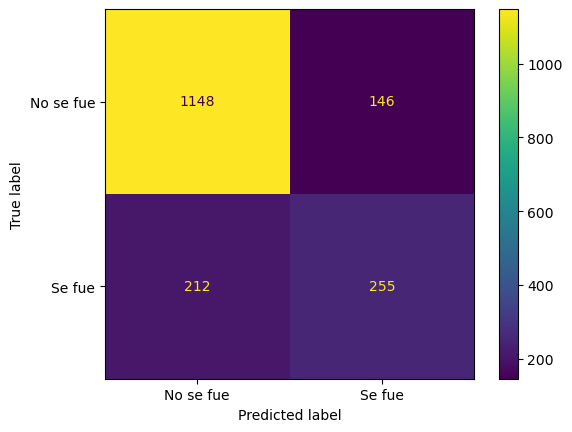

In [19]:
#ver cómo funciona el modelo entrenado con los datos de prueba
plot_confusion_matrix(modelo, X_test, y_test, values_format='d', display_labels=["No se fue","Se fue"])


En la matriz de confusión vemos que de 1294 personas que no se fueron, 1148 (88%) fueron clasificados correctamente. 

Y de los 467 personas que sí se fueron, 255 (54%) fueron clasificados correctamente. 

Entonces el modelo de XGBoost no fue tan bueno. Parte del problema es que los datos están imbalanceados. 

Ya que el hecho de que se vaya la gente y deje los servicios de IBM cuesta dinero, queremos capturar más la información de las personas que se fueron. La buena noticia es que XGBoost tiene un parámetro, 
*scale_pos_weight*, que ayuda con datos imbalanceados. 

Utilicemos **cross-validation** para optimizar los parámetros. 

#### Cross validation y GridSearch para optimizar los hiper-parámetros

XGBoost tiene muchísimos hiper-parámetros a ajustar ya sean:
- max_depth 
- learning_rate (eta)
- gamma
- reg_lambda

In [20]:
#como es bien tardado el proceso del ajuste de hiperparámetros, en lugar de optimizar todo
#de una vez, optimicé parámetros por secciones para hacerlo más rápido

#Ronda 1
#param_grid={
#    'max_depth':[3,4,5],
#    'learning_rate':[0.1,0.01,0.05],
#    'gamma':[0, 0.25,1],
#    'reg_lambda':[0,1,10],
#    'scale_pos_weight':[1,3,5]
#}

#Ronda 2
param_grid={
    'max_depth':[4],
    'learning_rate':[0.1,0.5,1],
    'gamma':[0.25],
    'reg_lambda':[10,20,100],
    'scale_pos_weight':[3]
}

optimal_params = GridSearchCV(
                            estimator=xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample=0.9,
                            colsample_bytree=0.5),
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=0,
                            n_jobs=10,
                            cv=3)

optimal_params.fit(X_train, y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test, y_test)],
                  verbose=False)
optimal_params.best_params_

C:\Users\Ricardo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Ricardo\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10,
 'scale_pos_weight': 3}

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10,
 'scale_pos_weight': 3}

In [21]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modelo = xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                           gamma=0.25,
                           learn_rate=0.1,
                           max_depth=4,
                           reg_lambda=10,
                           scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5)

modelo.fit(X_train, y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test, y_test)],
                  verbose=False)

[17:34:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)

C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


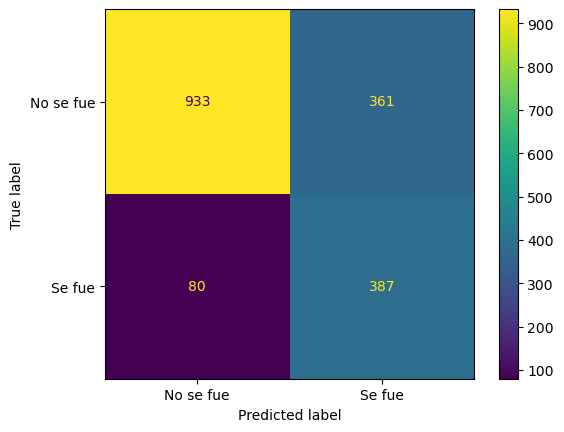

In [22]:
#ver cómo funciona el modelo entrenado con los datos de prueba
plot_confusion_matrix(modelo, X_test, y_test, values_format='d', display_labels=["No se fue","Se fue"])


En la matriz de confusión vemos que de 1294 personas que no se fueron, 933 (72%) fueron clasificados correctamente. 

Y de los 467 personas que sí se fueron, 387 (82%) fueron clasificados correctamente

#### Un poco de bibliografía...
https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning